In [16]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
data = pd.read_csv('./googleplaystore.csv')
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [18]:
print('%d Total amostras'%len(data))
data = data.dropna()
print('%d Total amostras (s/ NaN)'%len(data))

10841 Total amostras
9360 Total amostras (s/ NaN)


In [19]:
data.groupby(['Category']).agg('count')
category = {'1.9': 0, 'ART_AND_DESIGN': 1, 'AUTO_AND_VEHICLES': 2, 'BEAUTY': 3, 'BOOKS_AND_REFERENCE': 4, 'BUSINESS': 5, 'COMICS': 6, 'COMMUNICATION': 7, 'DATING': 8, 'EDUCATION': 9, 'ENTERTAINMENT': 10, 'EVENTS': 11, 'FAMILY': 12, 'FINANCE': 13, 'FOOD_AND_DRINK': 14, 'GAME': 15, 'HEALTH_AND_FITNESS': 16, 'HOUSE_AND_HOME': 17, 'LIBRARIES_AND_DEMO': 18, 'LIFESTYLE': 19, 'MAPS_AND_NAVIGATION': 20, 'MEDICAL': 21, 'NEWS_AND_MAGAZINES': 22, 'PARENTING': 23, 'PERSONALIZATION': 24, 'PHOTOGRAPHY': 25,  'PRODUCTIVITY': 26, 'SHOPPING': 27, 'SOCIAL': 28, 'SPORTS': 29, 'TOOLS': 30, 'TRAVEL_AND_LOCAL': 31, 'VIDEO_PLAYERS': 32, 'WEATHER': 33 }
data['categoryID'] = data['Category'].map(lambda i: category[i])

In [20]:
data.groupby(['Type']).agg('count')
type = {'0': 0, 'Free': 1, 'Paid': 2 }
data['typeID'] = data['Type'].map(lambda i: type[i])

In [21]:
data.groupby(['Content Rating']).agg('count')
type = {'Adults only 18+': 0, 'Everyone': 1, 'Everyone 10+': 2, 'Mature 17+': 3, 'Teen': 4, 'Unrated': 5 }
data['contentRatingID'] = data['Content Rating'].map(lambda i: type[i])

In [22]:
data['installsNumeric'] = data['Installs'].map(lambda i: int(i.replace('+','').replace(',','')))

In [23]:
data['priceNumeric'] = data['Price'].map(lambda i: float(i.replace('$','').replace('.','')))

In [24]:
data['reviewsNumeric'] = data['Reviews'].map(lambda i: int(i))

In [25]:
coluns_x = ['categoryID', 'Rating', 'reviewsNumeric', 'typeID', 'priceNumeric', 'contentRatingID']
coluns_y = ['installsNumeric']

data_x = data[coluns_x]
data_y = data[coluns_y]

train_x, test_x, train_y, test_y = train_test_split(data_x.values,
                                                    data_y.values,
                                                    test_size=.3)

In [26]:

model = Pipeline([('norm', MinMaxScaler()),
                  ('var_thr', VarianceThreshold(threshold=.02)),
                  ('pca', PCA(n_components=3)),
                  ('regressor', LinearRegression())
                 ])
model.fit(train_x, train_y)

Pipeline(memory=None,
     steps=[('norm', MinMaxScaler(copy=True, feature_range=(0, 1))), ('var_thr', VarianceThreshold(threshold=0.02)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [27]:
predictions = model.predict(test_x)
predictions

array([[15102406.43958391],
       [23248199.87314162],
       [15399068.53369205],
       ...,
       [13025771.78082695],
       [25986117.16643386],
       [31622696.95448847]])

<IPython.core.display.Javascript object>


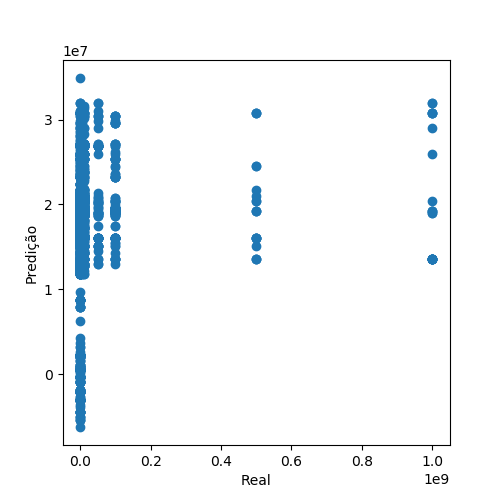

In [28]:
plt.figure(figsize=(5,5))
plt.xlabel("Real")
plt.ylabel("Predição")
plt.plot([0,1],[0,1],c='k')
plt.scatter(test_y, predictions);

In [29]:
print("MAE: %.3f"%(mean_absolute_error(test_y, predictions)))

MAE: 29527212.976


In [30]:
# Conclusões
# Foi escolhido um Dataset de downloads de Apps na Play Store
# Usando CRISP-DM bscamos resolver um problema conhecido, criando um modelo que 
# confrontasse os dados com o Número de downloads, utilizando uma técnica de regressão para avaliar o valor numérico "Installs"
# Foi necessário normalizar quase todos os campos, pois quase todos eram Strings com símbolos como por exemplo (+$,.)
# O resultado foi um gráfico vertifical, com quase todos os valores variando entre 0 e 0.1 no eixo x.
# Ao chegar nesse resultado, realizamos uma nova iteração e tentamos mudar nossa analise de  de Regressão Linear para K-média,
# no intuito de analisar esses dados em forma de clusters, porém tivemos problemas na exibição do gráfico, o que nos fez
# voltar para o resultado inicial.